<a href="https://colab.research.google.com/github/oggyu/MachineLearning/blob/master/FlowerClassifyAugmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import glob
import shutil

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator 



In [2]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(origin=_URL,
                                   fname="flower_photos.tgz",
                                   extract=True)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')
zip_dir_base = os.path.dirname(base_dir)
!find $zip_dir_base -type d -print

228818944/228813984 [==============================] - 2s 0us/step
/root/.keras/datasets
/root/.keras/datasets/flower_photos
/root/.keras/datasets/flower_photos/sunflowers
/root/.keras/datasets/flower_photos/roses
/root/.keras/datasets/flower_photos/tulips
/root/.keras/datasets/flower_photos/daisy
/root/.keras/datasets/flower_photos/dandelion


In [3]:
os.path.dirname(zip_file)

'/root/.keras/datasets'

# Train and Validation data not seperated. below code seperates it 

In [4]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir,'train', cl))
    shutil.move(t, os.path.join(base_dir,'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir,'val', cl)):
      os.makedirs(os.path.join(base_dir,'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')


roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


Found 2935 images belonging to 5 classes.


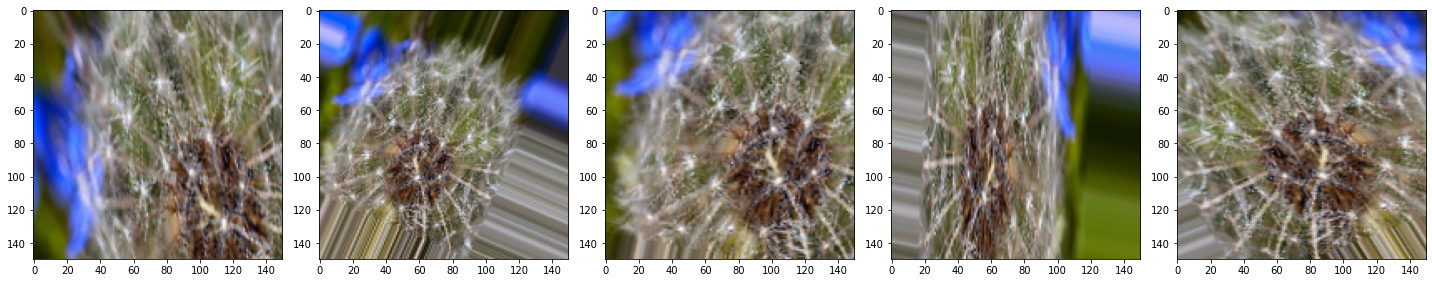

In [5]:
batch_size = 100
IMG_SHAPE = 150



image_gen_train = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )


train_data_gen = image_gen_train.flow_from_directory(
                                                batch_size=batch_size,
                                                directory=train_dir,
                                                shuffle=True,
                                                target_size=(IMG_SHAPE,IMG_SHAPE),
                                                class_mode='sparse'
                                                )

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)



augmentation happens while training 

augment image then use like this 

In [6]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                 directory=val_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='sparse')


model = Sequential()

model.add(Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SHAPE,IMG_SHAPE, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))

model.add(Dropout(0.2))
model.add(Dense(5,activation=tf.nn.softmax))


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Found 735 images belonging to 5 classes.


In [7]:
epochs = 30

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
30/30 [==============================] - 87s 3s/step - loss: 1.4869 - accuracy: 0.3966 - val_loss: 1.4120 - val_accuracy: 0.4898
Epoch 2/30
30/30 [==============================] - 85s 3s/step - loss: 1.3902 - accuracy: 0.5070 - val_loss: 1.3702 - val_accuracy: 0.5347
Epoch 3/30
30/30 [==============================] - 85s 3s/step - loss: 1.3504 - accuracy: 0.5503 - val_loss: 1.3373 - val_accuracy: 0.5605
Epoch 4/30
30/30 [==============================] - 85s 3s/step - loss: 1.3179 - accuracy: 0.5785 - val_loss: 1.3177 - val_accuracy: 0.5878
Epoch 5/30
30/30 [==============================] - 86s 3s/step - loss: 1.3035 - accuracy: 0.5963 - val_loss: 1.2845 - val_accuracy: 0.6014
Epoch 6/30
30/30 [==============================] - 85s 3s/step - loss: 1.2772 - accuracy: 0.6201 - val_loss: 1.2832 - val_accuracy: 0.6136
Epoch 7/30
30/30 [==============================] - 85s 3s/step - loss: 1.2701 - acc

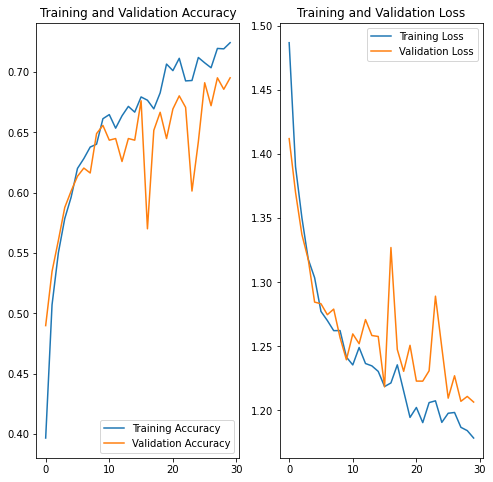

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
a = test_images[0]
plt.imshow(test_images[0][2])
print(a[0].shape)
print(test_labels[0])
print(test_labels[0][0])
print(len(val_data_gen))
print(np.argmax(predictions[0]))

NameError: ignored

[9.8504204e-01 4.4683111e-05 1.4913190e-02 6.1341682e-11 2.7912940e-08]


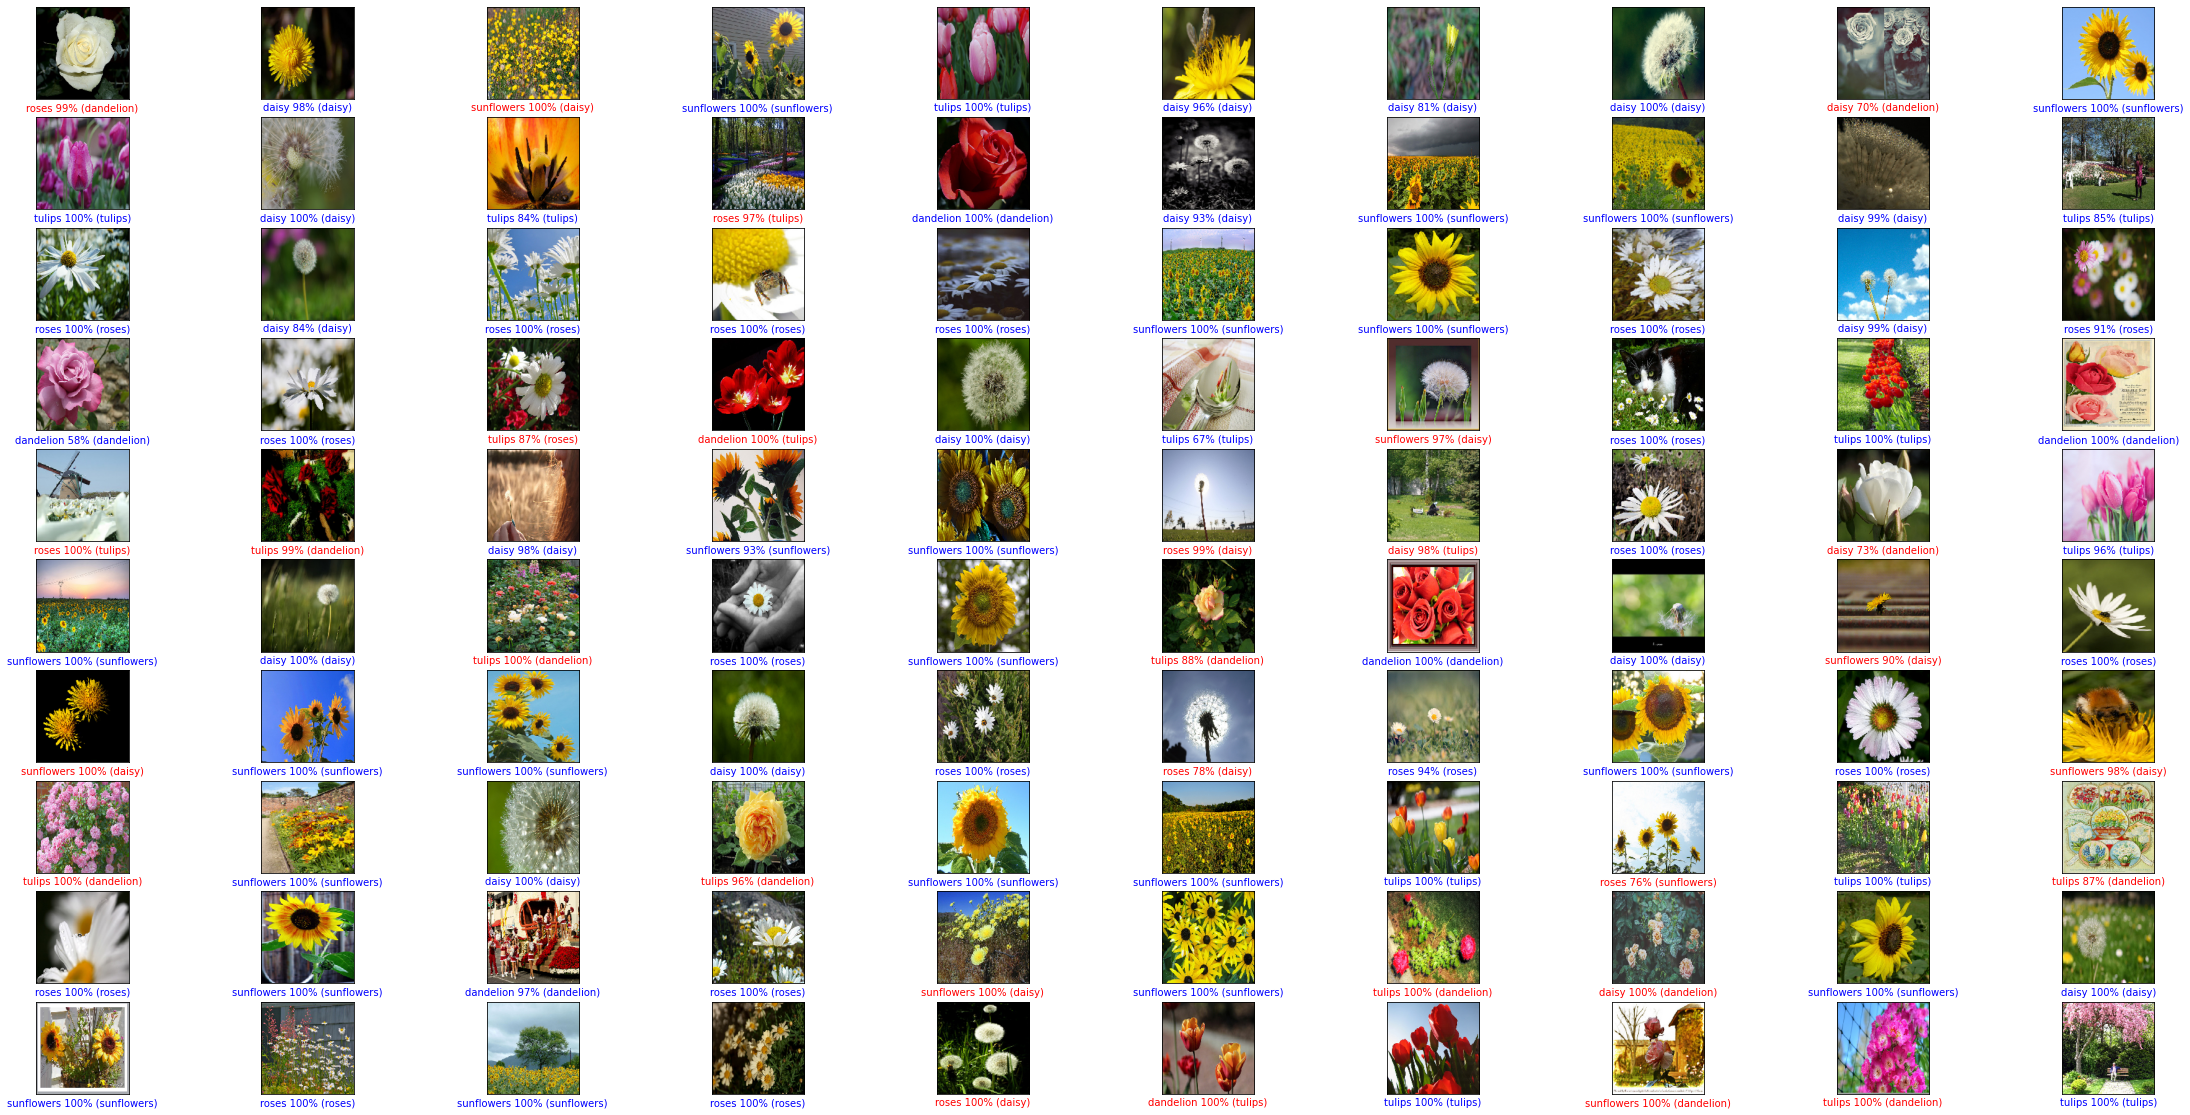

In [10]:

test_labels = val_data_gen[0][1]
test_images = val_data_gen[0][0]
predictions = model.predict(test_images)

print(predictions[0])
def plot_image(i, predictions_array, true_labels, images):
  predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
  true_label = tf.cast(true_label,tf.int64)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.brg)

  predicted_label = np.argmax(predictions_array,axis=0)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(classes[predicted_label],
                                100*np.max(predictions_array),
                                classes[true_label]),
                                color=color)
  

num_rows = 10
num_cols = 10
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
#  plt.subplot(num_rows, 2*num_cols, 2*i+2)
#  plot_value_array(i, predictions, test_labels)

여기에 오류 있음 daisy dandelion roses sunflowers tulips => roses daisy dandelion sunflowers tulips 순서대로 매칭이 되어버렸음 
그래도 학습 자체에는 문제가 없다 

In [ ]:
predictions = model.predict(val_data_gen[0][0])
k = np.argmax(predictions,axis = 1)
for i in k:
  print(classes[i])


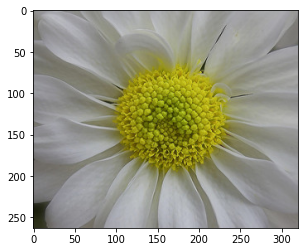

In [14]:
import matplotlib.image as mpimg
image = mpimg.imread('/root/.keras/datasets/flower_photos/train/daisy/100080576_f52e8ee070_n.jpg')
plt.imshow(image)

In [12]:
cd /root/.keras/datasets/flower_photos/train/daisy

/root/.keras/datasets/flower_photos/train/daisy


In [13]:
ls -la

total 27776
drwxr-xr-x 2 root   root  36864 Jul 29 09:22 ./
drwxr-xr-x 7 root   root   4096 Jul 29 09:22 ../
-rw-r----- 1 270850 5000  26797 Jan 11  2016 100080576_f52e8ee070_n.jpg
-rw-r----- 1 270850 5000 117247 Jan 11  2016 10140303196_b88d3d6cec.jpg
-rw-r----- 1 270850 5000  36410 Jan 11  2016 10172379554_b296050f82_n.jpg
-rw-r----- 1 270850 5000 132803 Jan 11  2016 102841525_bd6628ae3c.jpg
-rw-r----- 1 270850 5000  51688 Jan 11  2016 10391248763_1d16681106_n.jpg
-rw-r----- 1 270850 5000  13946 Jan 11  2016 10437754174_22ec990b77_m.jpg
-rw-r----- 1 270850 5000  13518 Jan 11  2016 10437770546_8bb6f7bdd3_m.jpg
-rw-r----- 1 270850 5000  84219 Jan 11  2016 10437929963_bc13eebe0c.jpg
-rw-r----- 1 270850 5000  86878 Jan 11  2016 10555749515_13a12a026e.jpg
-rw-r----- 1 270850 5000  93133 Jan 11  2016 10555815624_dc211569b0.jpg
-rw-r----- 1 270850 5000  59028 Jan 11  2016 10555826524_423eb8bf71_n.jpg
-rw-r----- 1 270850 5000 100584 Jan 11  2016 10559679065_50d2b16f6d.jpg
-rw-r----- 1 270850

In [ ]:
print(test_images[2].shape)
print(test_labels[0])
print(np.argmax(predictions[4]))

In [ ]:
test_images = val_data_gen[0][0]
test_labels = val_data_gen[0][1]
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(15):
  test_labels = tf.cast(test_labels,tf.int64)
  plt.subplot(1, 15, i+1)

  plt.imshow(test_images[i])
  print(classes[test_labels[i]])
